In [ ]:
#from google.colab import files
#files.upload();

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
df = pd.read_csv('vgames2.csv')
df = df.iloc[:,1:]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
print(df.info())
print('\n',df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB
None

                Year
count  16327.000000
mean    1994.242543
std      155.077168
min        0.000000
25%     2003.000000
50%     2007.000000
75%     2010.000000
max     2020.000000


#### - Sales들의 칼럼이 object >> 분석하기 위해 문자열 제거 후 수치형(int)으로 변환 
#### - Year 칼럼의 min 값이 0인 것을 보아 수치 조정을 할 필요성 있음
#### - 결측치 처리해야함

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

In [ ]:
df.shape

(16598, 9)

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 결측치 확인 후 제거
df_clean = df.dropna().reset_index(drop=True)
df_clean.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
# Sales 값 변환

def transform(x):
  if str(x).find('K') != -1:
    return float(str(x).split('K')[0].replace('.',''))*1000
  elif str(x).find('M') != -1:
    return float(str(x).split('M')[0].replace('.',''))*1000000
  else:
    return float(str(x).replace('.',''))*1000000

col = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for i in col:
  df_clean[i] = df_clean[i].apply(transform)
  df_clean[i] = df_clean[i].astype('int')

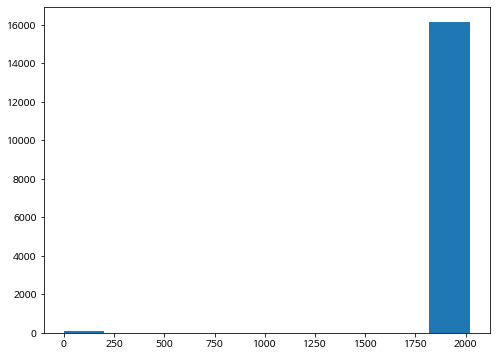

In [ ]:
# 연도 전처리

plt.figure(figsize=(8,6))
plt.hist(df_clean['Year'])
plt.show()

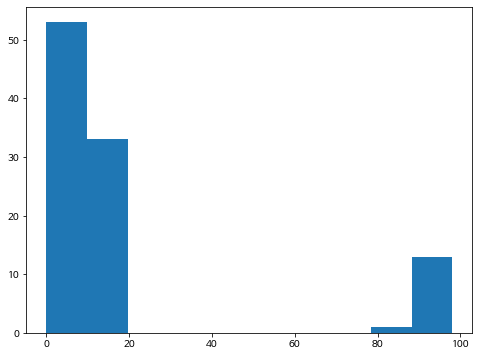

In [ ]:
# 연도 전처리
df_error = df_clean[df_clean['Year']<=250]

plt.figure(figsize=(8,6))
plt.hist(df_error['Year'])
plt.show()

In [ ]:
def year_transform(x):
  if x <= 20:
    return x + 2000
  elif  x <= 100:
    return x + 1900
  else:
    return x

df_clean['Year'] = df_clean['Year'].apply(year_transform)
df_clean['Year']= df_clean['Year'].astype('int')

In [ ]:
print(df_clean.info(),'\n')
print(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16241 non-null  object
 1   Platform     16241 non-null  object
 2   Year         16241 non-null  int64 
 3   Genre        16241 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16241 non-null  int64 
 6   EU_Sales     16241 non-null  int64 
 7   JP_Sales     16241 non-null  int64 
 8   Other_Sales  16241 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.1+ MB
None 

               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales
count  16241.000000  1.624100e+04  1.624100e+04  1.624100e+04  1.624100e+04
mean    2006.406748  2.415487e+07  1.333108e+07  6.999361e+06  4.486779e+06
std        5.832087  7.879148e+07  4.840276e+07  2.864415e+07  1.856339e+07
min     1980.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25% 

## 최종목표
다음 분기에 어떤 게임을 설계해야 할까?

## 분석할 내용

1. 지역에 따라서 선호하는 게임 장르가 다를까?
2. 연도별 게임의 트렌드가 있을까?
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
4. 회사 하나를 택해서 어떤 게임을 만들어야할지 분석해보자

# 1. 지역에 따라 선호하는 게임 장르가 다를까?

In [ ]:
df_clean['Platform'].unique()
# 플랫폼 >> pc 콘솔 휴대용으로 나누어서 분석해보자

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df_clean['Total_Sales'] = df_clean.iloc[:,-4:].sum(axis=1)
df_clean['10years'] = pd.cut(df_clean['Year'],bins=[0,1990,2000,2010,2020],labels=['90년 이전','91-00','01-10','11-20'])
df_clean['Platform_category']=np.where(df_clean.Platform=='PC','pc',
                              np.where((df_clean.Platform=='DS')|(df_clean.Platform=='PSP')|(df_clean.Platform=='GBA')|(df_clean.Platform=='3DS')|(df_clean.Platform=='GB')|
                                       (df_clean.Platform=='PSV')|(df_clean.Platform=='WS')|(df_clean.Platform=='GG'),'portable','console'))

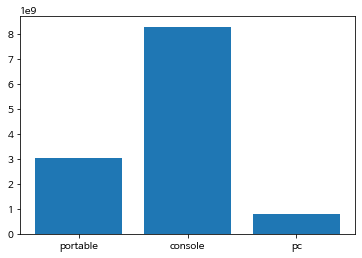

In [ ]:
plt.bar(df_clean['Platform_category'],df_clean['Total_Sales'])
plt.show()

콘솔게임의 판매량이 압도적인 것을 확인할 수 있다.

In [ ]:
# 지역별 선호하는 게임 장르
df_data = df_clean.drop('Year',axis=1)
Loc = df_data.groupby('Genre').sum()
Loc.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
NA_Sales,1.000000,0.983238,0.298597,0.967920,0.982245
EU_Sales,0.983238,1.000000,0.299016,0.991308,0.981365
JP_Sales,0.298597,0.299016,1.000000,0.272804,0.454564
Other_Sales,0.967920,0.991308,0.272804,1.000000,0.967109
Total_Sales,0.982245,0.981365,0.454564,0.967109,1.000000


상관관계를 통해 일본시장을 제외한 나머지 시장은 상당히 유사하다는 것을 알 수 있다.

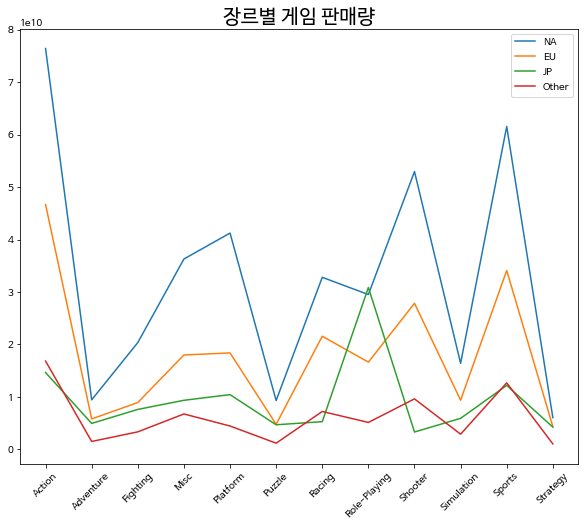

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(10,8))
plt.plot(Loc['NA_Sales'],label="NA")
plt.plot(Loc['EU_Sales'],label="EU")
plt.plot(Loc['JP_Sales'],label="JP")
plt.plot(Loc['Other_Sales'],label="Other")
plt.xticks(rotation=45)
plt.title("장르별 게임 판매량",fontsize=20)
plt.legend()
plt.show()

지역별로 선호하는 게임장르는 대부분 Action, Shooter Sports이다.

하지만 일본의 경우 특이하게 Role-Playing이 인기가 많은 것을 확인할 수 있다.

In [ ]:
p_value = chi2_contingency(Loc)[1]
p_value

0.0

**H0 : 지역별 장르별 판매량은 같다.**

**H1 : 지역별 장르별 판매량은 다르다.**


p-value값이 0이 나와서 H0를 기각한다.

따라서 지역별 장르별 판매량은 다르다고 볼 수 있다..

# 2. 연도별 게임 트렌드가 있을까?

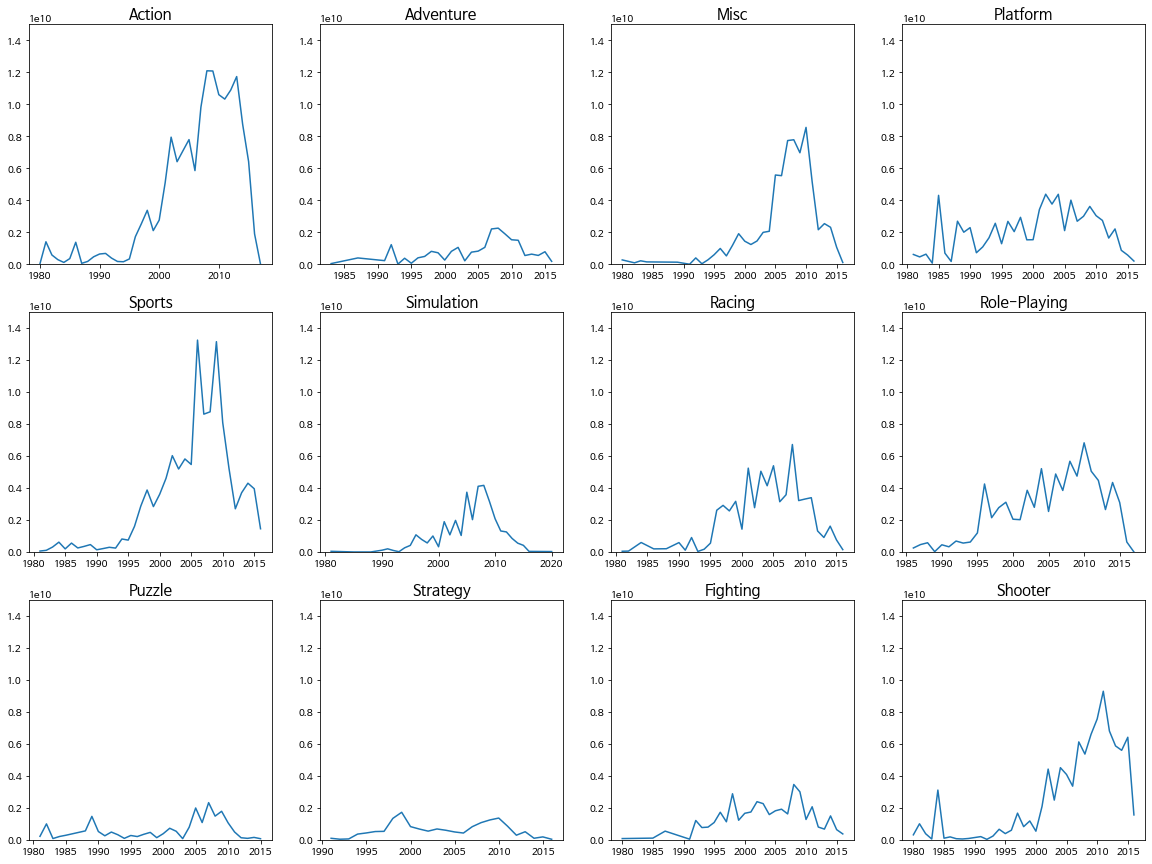

In [ ]:
plt.figure(figsize=(20,15))
genre = df_clean['Genre'].unique()
for i,k in enumerate(genre):
  plt.subplot(3,4,1+i)
  plt.plot(df_clean[df_clean['Genre'] == genre[i]].groupby('Year')['Total_Sales'].sum())
  plt.title(str(k),fontsize=15)
  plt.ylim(0,15000000000)
plt.show()

장르별 게임 판매량 확인결과 대부분 변한다는 것을 볼 수 있다.

대부분의 장르가 1995년부터 판매량이 증가하고, 2010년 이후 감소하는 것 같다.

하지만 Adventure이나 Strategy의 경우 그래프가 미미하여 확신할 수 없기에 통계적 검증이 필요하다.




In [ ]:
strategy = df_clean[df_clean['Genre']=='Strategy']
tab = pd.crosstab(strategy.Total_Sales,strategy['10years'])
p1 = chi2_contingency(tab)[1]
print('p-value : ',p1)

p-value :  0.015816555743268658


In [ ]:
adventure = df_clean[df_clean['Genre']=='Adventure']
tab2 = pd.crosstab(adventure.Total_Sales,adventure['10years'])
p2 = chi2_contingency(tab2)[1]
print('p-value : ',p2)

p-value :  3.6419420361054036e-94


**H0 : 해당 장르의 총 판매량과 년도 간에는 관련이 없다.**

**H1 : 해당 장르의 총 판매량과 년도 간에는 관련이 있다**

Strategy, adventure의 총 판매량과 년도간의 카이제곱검정을 한 결과 p값이 0에 가깝게 나오므로 귀무가설을 기각한다.

 따라서 두 장르는 년도에 따른 트렌드가 있다고 볼 수 있다.

In [ ]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,10years,Platform_category
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4000000,0,0,0,4000000,01-10,portable
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17000000,0,0,1000000,18000000,01-10,console
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,2000000,0,2000000,01-10,portable
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4000000,0,0,0,4000000,01-10,portable
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12000000,9000000,0,4000000,25000000,01-10,console
...,...,...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,15000000,4000000,0,1000000,20000000,01-10,console
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1000000,0,0,0,1000000,01-10,portable
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,44000000,19000000,3000000,13000000,79000000,11-20,console
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,5000000,5000000,25000000,3000000,38000000,11-20,portable


In [ ]:
dfyear = df_data.groupby(['10years','Platform_category']).sum()


NA_Sales     EU_Sales     JP_Sales  \
10years Platform_category                                           
90년 이전  console             20819060000   2767110000   8997000000   
        pc                            0      5000000            0   
        portable             2163000000    827000000   1408000000   
91-00   console             48649430000  24143660000  29124180000   
        pc                   2772000000   1898000000      9000000   
        portable             5324000000   3516000000   5193000000   
01-10   console            178094210000  88469590000  22318940000   
        pc                   3050020000   6057080000      8000000   
        portable            58268100000  28765450000  24803460000   
11-20   console             60177030000  47264770000   8174510000   
        pc                   2604820000   5064070000            0   
        portable            10377620000   7732410000  13640530000   

                           Other_Sales   Total_Sales  
10years Platform_category                             
90년 이전  console              627190000   33210360000  
        pc                     2000000       7000000  
        portable             132000000    4530000000  
91-00   console             4586180000  106503450000  
        pc                   125000000    4804000000  
        portable             503000000   14536000000  
01-10   console            36706740000  325589480000  
        pc                   994020000   10109120000  
        portable            9805250000  121642260000  
11-20   console            15973060000  131589370000  
        pc                  1159250000    8828140000  
        portable            2256080000   34006640000

# 3. 판매량이 높은 게임 분석

In [ ]:
df_clean.shape[0]

16241

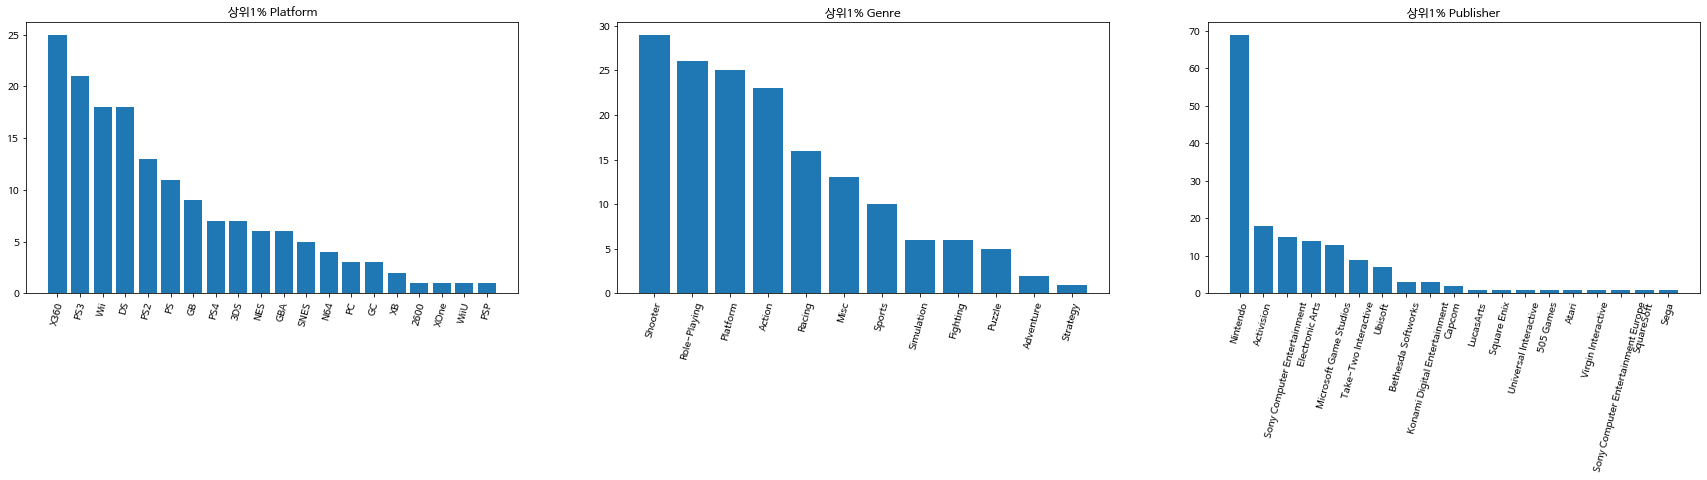

In [ ]:
top = df_clean.nlargest(162,columns='Total_Sales')

fig, ax = plt.subplots(1, 3, figsize=(30,5))
ax[0].bar(top['Platform'].value_counts().index,top['Platform'].value_counts())
ax[0].set_title('상위1% Platform')
ax[1].bar(top['Genre'].value_counts().index,top['Genre'].value_counts())
ax[1].set_title('상위1% Genre')
ax[2].bar(top['Publisher'].value_counts().index,top['Publisher'].value_counts())
ax[2].set_title('상위1% Publisher')

for i in range(3):
  ax[i].xaxis.set_tick_params(rotation=75)
plt.show()

판매량 상위1%의 데이터 중 top3
- 제작회사 : Nintendo, Activision, Sony Computer Entertainment
- 장르 : Shooter, Role-Playing, Platform
- 플랫폼 : X360, PS3, Wii

### 4. 내가 Sony 직원이라면, 어떤 게임을 설계해야 할까?

새 게임을 출시하여 2위인 Activision 자리를 노리려고 한다.

그럴려면 어떤 게임을 만들어야할까?

- Sony의 메인 장르는?
- Sony의 메인 플랫폼은 무엇인가?
- Sony사의 판매량이 높은 지역은?

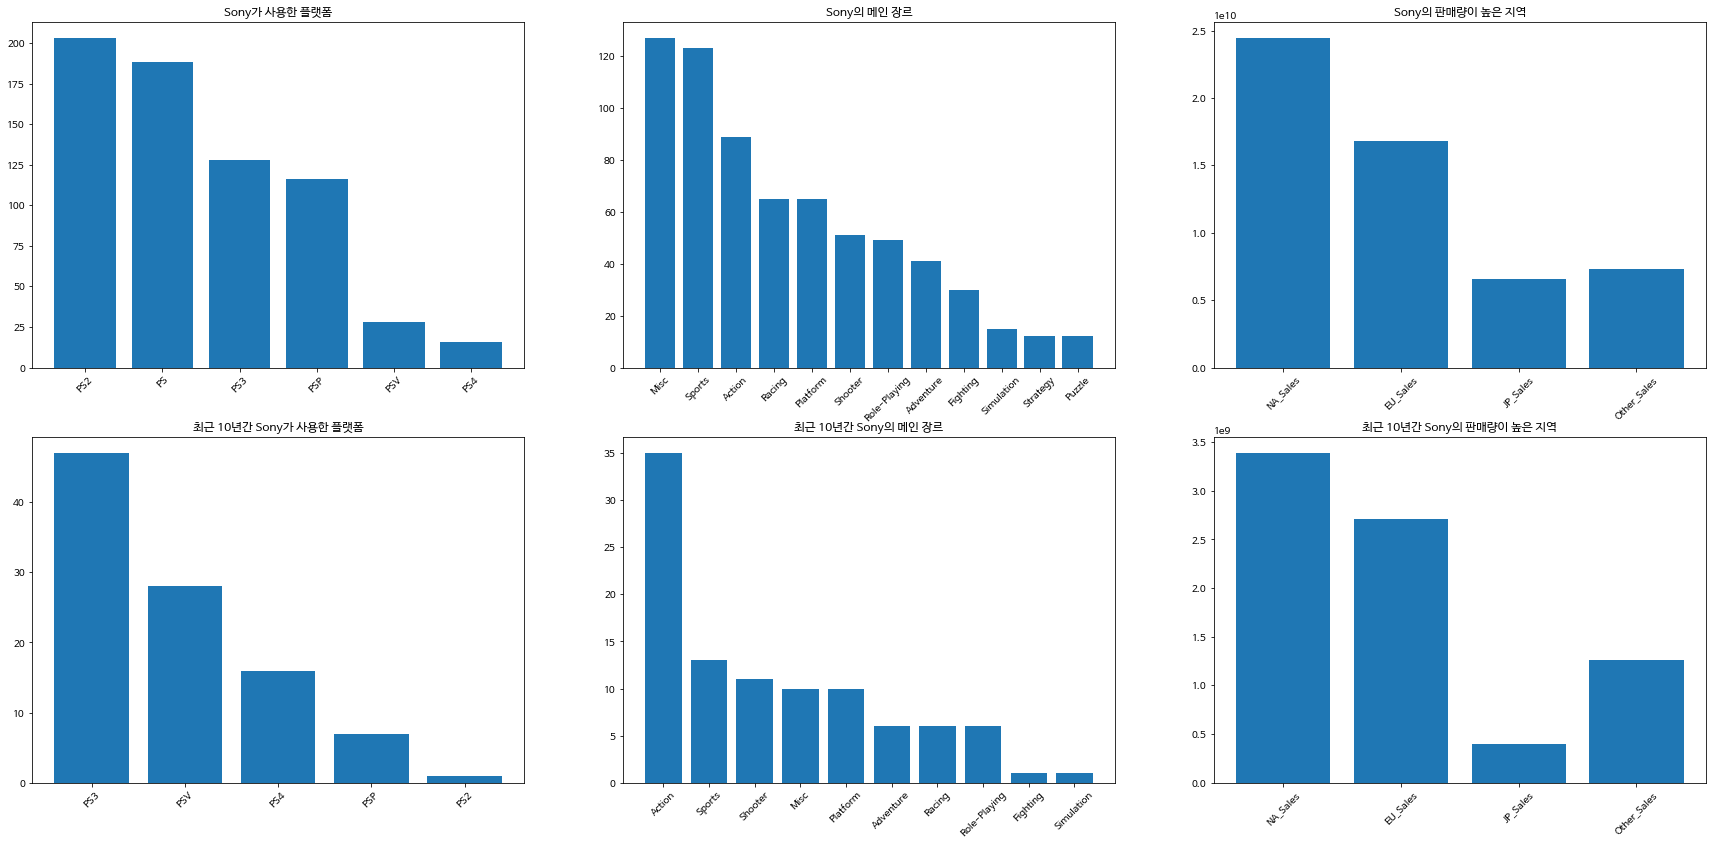

In [ ]:
sony = df_clean[df_clean['Publisher']=='Sony Computer Entertainment'].reset_index(drop=True)
sony_platform = sony['Platform'].value_counts()
sony_genre = sony['Genre'].value_counts()
sony_region = sony[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

sony_recent10 = sony[sony['10years']=='11-20']
sony_platform10 = sony_recent10['Platform'].value_counts()
sony_genre10 = sony_recent10['Genre'].value_counts()
sony_region10 = sony_recent10[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

fig, ax = plt.subplots(2,3,figsize=(30,14))
ax[0,0].bar(sony_platform.index, sony_platform)
ax[0,0].set_title('Sony가 사용한 플랫폼')
ax[0,1].bar(sony_genre.index, sony_genre)
ax[0,1].set_title('Sony의 메인 장르')
ax[0,2].bar(sony_region.index, sony_region)
ax[0,2].set_title('Sony의 판매량이 높은 지역')

ax[1,0].bar(sony_platform10.index, sony_platform10)
ax[1,0].set_title('최근 10년간 Sony가 사용한 플랫폼')
ax[1,1].bar(sony_genre10.index, sony_genre10)
ax[1,1].set_title('최근 10년간 Sony의 메인 장르')
ax[1,2].bar(sony_region10.index, sony_region10)
ax[1,2].set_title('최근 10년간 Sony의 판매량이 높은 지역')

for j in range(2):
  for i in range(3):
    ax[j,i].xaxis.set_tick_params(rotation=45)
plt.show()

연도에 따라 게임 트렌드가 바뀌는 것을 위에서 확인했다.

따라서 최근 10년간의 데이터를 확인한 결과, 

PS3 플랫폼을 이용하여 Action 게임을 출시하는게 옳은 선택이다.

출시 지역은 NA(북미)로 하는게 맞다.

- 출시할 게임 플랫폼 : PS3
- 출시할 게임 장르 : Action
- 게임 출시할 지역 : NA